In [76]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
traps = pd.read_csv('assets/train.csv')
spray = pd.read_csv('assets/spray.csv')
weather = pd.read_csv('assets/weather.csv')

In [77]:
import datetime
### Modify trap dataset

# Convert Date column to actual date data type
traps.Date = pd.to_datetime(traps.Date,format='%Y-%m-%d')

# Convert Date column to actual date data type
spray.Date = pd.to_datetime(spray.Date,format='%Y-%m-%d')

traps.Date = [x.date() for x in traps.Date]
spray.Date = [x.date() for x in spray.Date]



# Create dummies for Species and Trap
dummies = pd.get_dummies(traps, columns=['Species'])

# Create a new df with the dummies
traps_2_cols = traps.columns.drop('Species')
traps_2 = pd.concat([traps[traps_2_cols],dummies])
# traps_2.head()


,Address,AddressAccuracy,AddressNumberAndStreet,Block,Date,Latitude,Longitude,NumMosquitos,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Street,Trap,WnvPresent
0,"4100 North Oak Park Avenue, Chicago, IL 60634,...",9,"4100 N OAK PARK AVE, Chicago, IL",41,2007-05-29,41.954690,-87.800991,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N OAK PARK AVE,T002,0
1,"4100 North Oak Park Avenue, Chicago, IL 60634,...",9,"4100 N OAK PARK AVE, Chicago, IL",41,2007-05-29,41.954690,-87.800991,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N OAK PARK AVE,T002,0
2,"6200 North Mandell Avenue, Chicago, IL 60646, USA",9,"6200 N MANDELL AVE, Chicago, IL",62,2007-05-29,41.994991,-87.769279,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N MANDELL AVE,T007,0
3,"7900 West Foster Avenue, Chicago, IL 60656, USA",8,"7900 W FOSTER AVE, Chicago, IL",79,2007-05-29,41.974089,-87.824812,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W FOSTER AVE,T015,0
4,"7900 West Foster Avenue, Chicago, IL 60656, USA",8,"7900 W FOSTER AVE, Chicago, IL",79,2007-05-29,41.974089,-87.824812,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W FOSTER AVE,T015,0


In [ ]:
from geopy.distance import vincenty

traps['spray'] = 'N'
for i in range(0,len(traps)+1):
    trap_lat = traps.Latitude[i] 
    trap_long = traps.Longitude[i]
    spray_lat = traps.Latitude[i] 
    spray_long = traps.Longitude[i]
    a = (trap_lat, trap_long)
    b = (spray_lat, spray_long)
    if vincenty(a, b).miles < 0.25:
        traps.spray[i] = 'Y'

In [35]:
## I spent a while trying to figure out how to update
## values in the pandas dataframe, but was very
## unsuccessful. I decided to run the updates using SQL instead.

## set up connection to SQLalchemy
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')
conn = engine.connect()

## push dataframes into sql tables
spray.to_sql('spray', engine)
traps.to_sql('traps', engine)

## run updates to fill in county names by matching zip_codes to lookup data

pd.read_sql('select spray.*,traps.Longitude from spray join traps on spray.Latitude = traps.Latitude',conn)
# pd.read_sql('select spray.* from spray join traps on spray.Latitude = traps.Latitude and spray.Longitude = traps.Longitude',conn)
# 
# conn.execute(q1)
# conn.execute(q2)

## pull sql table back into a pandas df
# liquor = pd.read_sql_table('liquor',engine)

## close sql connection
# conn.close()

,index,Date,Time,Latitude,Longitude,Longitude
0,6891,2013-08-08,8:31:34 PM,41.918705,-87.70531,-87.752329
1,6891,2013-08-08,8:31:34 PM,41.918705,-87.70531,-87.752329
2,6891,2013-08-08,8:31:34 PM,41.918705,-87.70531,-87.752329
3,6891,2013-08-08,8:31:34 PM,41.918705,-87.70531,-87.752329
4,6891,2013-08-08,8:31:34 PM,41.918705,-87.70531,-87.752329
5,6891,2013-08-08,8:31:34 PM,41.918705,-87.70531,-87.752329
6,6891,2013-08-08,8:31:34 PM,41.918705,-87.70531,-87.752329
7,6891,2013-08-08,8:31:34 PM,41.918705,-87.70531,-87.752329
8,6891,2013-08-08,8:31:34 PM,41.918705,-87.70531,-87.752329
9,6891,2013-08-08,8:31:34 PM,41.918705,-87.70531,-87.752329


In [28]:
pd.read_sql('select * from traps',conn)


,index,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
5,5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0
6,6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0
7,7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
8,8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
9,9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0


In [30]:
traps.merge(spray, left_on=['Date','Latitude','Longitude'], right_on=['Date','Latitude','Longitude'])

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Time


In [78]:
from shapely.geometry import mapping, shape, Point
from shapely.geometry.base import BaseGeometry
from six import string_types

from geopandas import GeoSeries, GeoDataFrame
from geopandas.base import GeoPandasBase
from geopandas.plotting import plot_dataframe
import geopandas.io

In [79]:
boros = GeoDataFrame.from_file('Neighborhoods_2012b.shp')
boros = geopandas.GeoDataFrame(boros,geometry="geometry")
# boros.plot()

In [84]:
traps_map

,geometry
0,POINT (-87.800991 41.95469)
1,POINT (-87.800991 41.95469)
2,POINT (-87.769279 41.994991)
3,POINT (-87.82481199999999 41.974089)
4,POINT (-87.82481199999999 41.974089)
5,POINT (-87.666455 41.9216)
6,POINT (-87.65449100000001 41.891118)
7,POINT (-87.654224 41.867108)
8,POINT (-87.654224 41.867108)
9,POINT (-87.655232 41.896282)


In [82]:
boros.crs = {"init": "epsg:4326"}
traps_map = traps[['Latitude','Longitude']]
traps_map["geometry"] = traps_map.apply(lambda row: Point(row["Longitude"], row["Latitude"]), axis=1)
del(traps_map["Latitude"], traps_map["Longitude"])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


TypeError: Empty 'DataFrame': no numeric data to plot

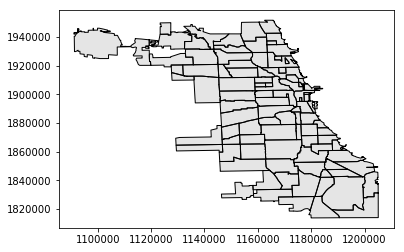

In [83]:
fig, ax = plt.subplots(1)
boros.plot(ax=ax, color="#cccccc")
traps_map.plot(ax=ax, markersize=5, color="#cc0000")
plt.show()